In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Vattenbalans Sverige
Man kan försöka undersöka vattenbalansen i Sverige (under ett rimligt tidsintervall) genom att hitta funktioner (m.h.a. minsta kvadratmetoden) för vattenuttag och vattentillgång, och sedan göra en for-loop som använder sig av ekvationen nedan (WEI+ är ett index på vattenbrist: värden över 20% = vattenbrist).

$WEI = \frac{Vattenuttag}{Förnybart vatten}$

ekvationen: https://www.smhi.se/polopoly_fs/1.152541!/Hydrologi_120.pdf

### Vattenuttag kod och graf

In [75]:
data = pd.read_csv("water-withdrawals-per-capita.csv", sep = ',')


vatten_uttag = data['water_withdrawal'].tolist()
x_ar = data['Year'].tolist()


In [102]:
fit_coeffs = np.polyfit( x_ar , vatten_uttag , 4) # fjärde-gradens-polynom-anpassning f(x) = a + b*x + c*x**2 + d*x**3 + e*x**4
x_1 = np.linspace(1970,2011, 41)
funklist = np.polyval(fit_coeffs, x_1)

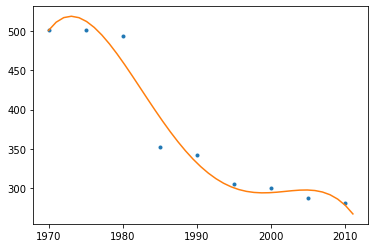

In [103]:
plt.plot(x_ar, vatten_uttag, '.')
plt.plot(x_1, funklist)
plt.show()

### Tillgänglit vatten kod och graf

In [104]:
ddata = pd.read_csv("renewable-water-resources-per-capita.csv", sep=",")


vatten_tillgang = ddata['Renewable_freshwater'].tolist()
x_ar2 = ddata['Year'].tolist()

 
x_2 = np.linspace(1962, 2015, 53)
curvefit_2 = np.polyfit(x_ar2, vatten_tillgang, 4)
funklist_2 = np.polyval(curvefit_2, x_2)    



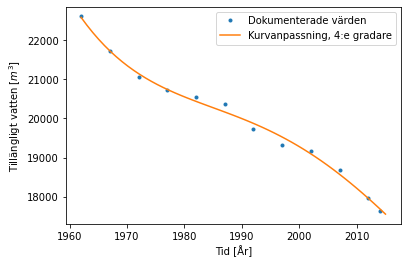

In [105]:
plt.plot(x_ar2, vatten_tillgang, ".", label="Dokumenterade värden")
plt.plot(x_2, funklist_2,label="Kurvanpassning, 4:e gradare" )
plt.ylabel("Tillängligt vatten [$m^3$]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()

[22589.88745117 22388.14886475 22201.20423317 22028.12068939
 21867.98921585 21719.92460632 21583.06547928 21456.57430267
 21339.63733482 21231.46468925 21131.29030609 21038.37193298
 20951.99118805 20871.45345306 20796.08799934 20725.24788857
 20658.31001854 20594.67512512 20533.76775169 20475.03629684
 20417.95295906 20362.01377296 20306.73859978 20251.67115021
 20196.37892914 20140.45329475 20083.50941467 20025.18629265
 19965.14676094 19903.07748032 19838.68894005 19771.71543121
 19701.91511917 19629.06996918 19552.98575783 19473.49212646
 19390.44251442 19303.71421051 19213.20831871 19118.84976578
 19020.58733368 18918.39357567 18812.26493073 18702.22163773
 18588.30777359 18470.59122849 18349.16373634 18224.14084244
 18095.66193962 17963.89021492 17829.01274109 17691.24035454
 17550.80775833]


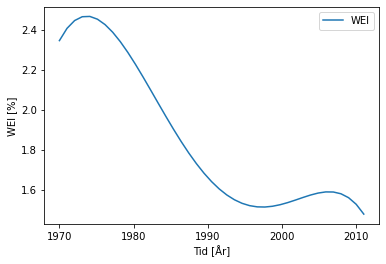

In [110]:
print(funklist_2)

wei= funklist/funklist_2[8:-4]
weiprocent= wei*100
plt.plot(x_1, weiprocent, label="WEI")
plt.ylabel("WEI [%]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()